# **Customer Segmentation and Spending Prediction**

Welcome to my project for customer segmentation and spending prediction! In this project, I will walk you through the entire process, from data preparation and exploration to building machine learning models. So, let's dive in!

## Data Preparation and Setup
First, we need to set up our environment and acquire the dataset. Here are the steps:

### Install Kaggle and Configure API Credentials

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

### Download the Dataset
We will download the "Customers Dataset" from Kaggle:

In [ ]:
! kaggle datasets download -d datascientistanna/customers-dataset

  0% 0.00/23.2k [00:00<?, ?B/s]
100% 23.2k/23.2k [00:00<00:00, 29.0MB/s]


### Unzip the Dataset
Unzip the downloaded dataset:

In [ ]:
! unzip customers-dataset

Archive:  customers-dataset.zip
  inflating: Customers.csv           


In [ ]:
! rm customers-dataset.zip

Now that we have our data, let's proceed with the project.

## Data Exploration
Let's begin by exploring our dataset. We will load it into a Pandas DataFrame and take a look at the first few rows to get an overview.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
dataset_path = "/content/Customers.csv"
dataset = pd.read_csv(dataset_path)
dataset.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


## Data Preprocessing
Data preprocessing is essential to clean and prepare our dataset for analysis. We will handle missing values and encode categorical variables. Here's a snippet of our preprocessing steps:

In [ ]:
dataset = dataset.drop("CustomerID", axis=1)

In [ ]:
dataset.apply(lambda col: len(col.unique()))

Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                  10
Work Experience             18
Family Size                  9
dtype: int64

## Exploratory Data Analysis (EDA)
Exploring the data helps us understand the distribution of features and relationships between them. Here are some EDA snippets:

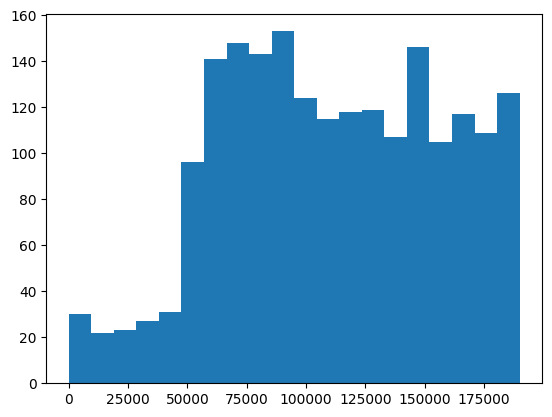

In [ ]:
plt.hist(dataset["Annual Income ($)"], bins=20)
plt.show()

In [ ]:
X, y = dataset.drop("Spending Score (1-100)", axis=1), dataset["Spending Score (1-100)"]

In [ ]:
X["Income_by_Experience"] = X["Annual Income ($)"] / (X["Work Experience"] + 1e-10)
X["Experience_per_member"] = X["Work Experience"] / (X["Family Size"] + 1e-10)
X["Income_per_member"] = X["Annual Income ($)"] / (X["Family Size"] + 1e-10)
X["Experience_by_age"] = X["Work Experience"] / (X["Age"] + 1e-10)
X["Age_by_family"] = X["Age"] / (X["Family Size"] + 1e-10)
X["Income_by_age"] = X["Annual Income ($)"] / (X["Age"] + 1e-10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualization

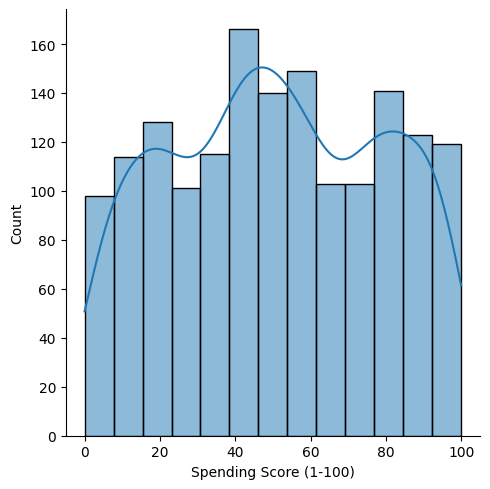

In [ ]:
sns.displot(y_train, kde=True)

In [ ]:
num_columns = X_train.select_dtypes(include=['int', 'float']).columns

for col in X_train.columns:

    if col in num_columns:
        sns.displot(X_train, x=col, kde=True)

    else:
        sns.countplot(X_train, x=col)

In [ ]:
corr = X_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            annot=True, fmt='.1%',
            cbar=True, cbar_kws={'shrink':0.5})

In [ ]:
sns.pairplot(X_train, hue="Gender")

In [ ]:
sns.pairplot(X_train, hue="Profession")

In [ ]:
sns.scatterplot(X_train, x="Annual Income ($)", y="Work Experience")

In [ ]:
corr = X_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            annot=True, fmt='.1%',
            cbar=True, cbar_kws={'shrink':0.5})

In [ ]:
def clean_data(df):

    encoder = LabelEncoder ()
    imputer = SimpleImputer (strategy="most_frequent")
    df["Gender"] = df["Gender"].replace({'Male':0, 'Female':1})
    df['Profession'] = encoder.fit_transform(df['Profession'])
    df = imputer.fit_transform(df)

    return df

In [ ]:
X_train = clean_data(X_train)
X_test = clean_data(X_test)

## Machine Learning Models
We will build and evaluate several machine learning models for spending prediction:

* Support Vector Machine (SVM)
* Extra Trees Regressor
* AdaBoost Regressor
* XGBoost Regressor
* LightGBM Regressor

<br/>
Here's a snippet of the model building process:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor ( random_state=42)
rnd.fit(X_train, y_train)

In [ ]:
pd.DataFrame({'Features':X.columns, 'Importance':rnd.feature_importances_}).sort_values(by='Importance', ascending=False)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVR (C=0.01)
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
svm_ = sqrt(mean_squared_error(y_test, y_svm))
print(f"SVM loss : {svm_}")

SVM Accuracy : 0.017494531771197554


In [ ]:
ext = ExtraTreesRegressor (max_depth = 5, random_state=42)
ext.fit(X_train, y_train)
y_ext = ext.predict(X_test)
ext_ = sqrt(mean_squared_error(y_test, y_ext))
print(f"SVM loss : {ext_}")

Extra Trees Regressor Accuracy : 26.78293743301861


In [ ]:
ada = AdaBoostRegressor ()
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
ada_ = sqrt(mean_squared_error(y_test, y_ada))
print(f"AdaBoost loss : {ada_}")

AdaBoost Accuracy : 27.474331687349252


In [ ]:
xgb = XGBRegressor (eta=0.1, max_depth=4, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
xgb_ = sqrt(mean_squared_error(y_train, y_xgb))
print(f"XGBoost loss : {xgb_}")

XGBoost Accuracy : 21.904487921152384


In [ ]:
lgb = lightgbm.LGBMRegressor (objective='regression', n_jobs=-1, random_state=42)
lgb.fit(X_train, y_train)
y_lgb = lgb.predict(X_test)
lgb_ = sqrt(mean_squared_error(y_train, y_lgb))
print(f"LGBoost loss : {lgb_}")

LGBoost Accuracy : 15.785272896430286


### Stacking Models
The key focus of this project is on stacking models. Stacking is an ensemble learning technique that combines predictions from multiple models to achieve better predictive performance. The code demonstrates stacking by training a Random Forest Regressor on the predictions of the individual models (SVM, Extra Trees, AdaBoost, XGBoost, LightGBM).

In [ ]:
train_estimators = [y_val_svm, y_val_ext, y_val_ada, y_val_xgb, y_val_lgb]
test_estimators = [y_svm, y_ext, y_ada, y_xgb, y_lgb]

In [ ]:
y_train_data = np.stack(train_estimators, 1)
y_test_data = np.stack(test_estimators, 1)

In [ ]:
stack_rnd = RandomForestRegressor ()
stack_rnd.fit(y_train_data, y_train)

RandomForestRegressor()

## Model Evaluation
Finally, we evaluate our models using the root mean squared error (RMSE) and visualize the results. The final accuracy of the stacked model is calculated as well.

In [ ]:
y_final = stack_rnd.predict(y_test_data)
final_accuracy = sqrt(mean_squared_error(y_test, y_final))
print(f"Final Loss of Stacked model : {final_accuracy/y_test.shape[0]}")

Final Accuracy of Stacked model : 0.08501357963216818
